In [19]:
#general
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores

import matplotlib.pyplot as plt
from PIL import Image as PI

# Original Image Testing

Here we are going to look at the original data and print out a couple of correct PDM Values

In [22]:
#Import Original Data
raw_data_csv = "image_table_data.csv"
data_folder = "D:/Machine_Learning/Datasets/corpus_learning"
image_folder = "D:/Machine_Learning/Datasets/corpus_learning/training_data/"

In [33]:
raw_data = import_data(raw_data_csv, data_folder)
filename = 'corpus_image_original_1_angle_180.jpg'

In [41]:
def print_PDM_Image(raw_data, image_folder, filename):
    file = raw_data.loc[raw_data['Filename'] == filename]
    image = PI.open(image_folder + filename)
    X_1 = file.iloc[0][1]
    X_2 = file.iloc[0][3]
    X_3 = file.iloc[0][5]
    X_4 = file.iloc[0][7]
    X_val = np.array([])
    X_val = np.append(X_val,X_1)
    X_val = np.append(X_val,X_2)
    X_val = np.append(X_val,X_3)
    X_val = np.append(X_val,X_4)

    Y_1 = file.iloc[0][2]
    Y_2 = file.iloc[0][4]
    Y_3 = file.iloc[0][6]
    Y_4 = file.iloc[0][8]
    Y_val = np.array([])
    Y_val = np.append(Y_val,Y_1)
    Y_val = np.append(Y_val,Y_2)
    Y_val = np.append(Y_val,Y_3)
    Y_val = np.append(Y_val,Y_4)
    
    return image, X_val, Y_val

In [52]:
image, X_val, Y_val = print_PDM_Image(raw_data, image_folder, 'corpus_image_original_1_angle_180.jpg')


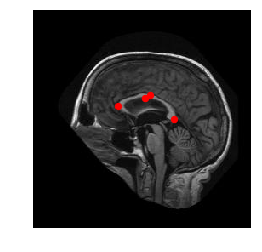

In [53]:
#Show PDM
from matplotlib import pyplot as plt
plt.imshow(image, interpolation='nearest')
plt.scatter(x=X_val, y=Y_val, c='r', s=40)
plt.axis('off')
plt.savefig('First_PDM_180.jpg')
plt.show()

# Experiment Data

Now we are going to Look at the data from our runs and print a graph of our training data

In [73]:
raw_train_data = import_data("Total_Loss.csv", "C:/Users/sdgeo/Dropbox/Own/Graduate-School/First_Semester/COMP_775/Workspace/Final_Project/Comp_775_Final_Project/Presentation")
raw_train_data

,Wall time,Step,Value
0,1.544470e+09,1,2352.585205
1,1.544470e+09,2,1611.608643
2,1.544470e+09,3,2986.747070
3,1.544470e+09,4,2865.548828
4,1.544470e+09,5,1947.527222
5,1.544470e+09,6,1966.508911
6,1.544470e+09,7,1947.465332
7,1.544470e+09,8,2544.495117
8,1.544470e+09,9,2019.002930
9,1.544470e+09,10,1040.916992


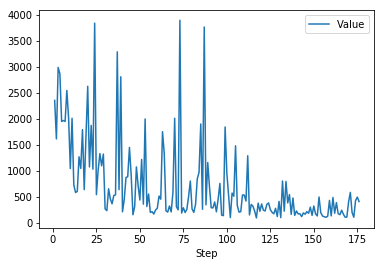

In [74]:
from matplotlib import pyplot as plt
raw_train_data.plot(kind='line', x='Step', y='Value')
plt.axis('on')
plt.savefig('Total_Loss.jpeg')
plt.show()